# Atividade 2 - Operações sobre conjuntos Fuzzy

Programar (em qualquer linguagem) os operadores estudados, aplicá-los sobre os conjuntos fuzzy triangulares abaixo e mostrar o conjunto fuzzy resultante.

![](img/conjunto.png)

---
## Operações em Conjuntos Fuzzy
  * **Operações padrão**
     * _Complemento Fuzzy_
     * _Intersecção Fuzzy_
     * _União Fuzzy_
  * **Operações Generalizadas**
     * _T-Normas e intersecção generalizada_
     * _T-conormas e União generalizada_
     * _Dualidade e leis de De Morgan_
---

### Conjuntos A e B

In [6]:
# import lib
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:

def get_pertinence_triangle(a,m,b,x, max_degree=None):
    
    if x <= a or x >= b:
        return 0
    
    if x == m and max_degree != None:
        return max_degree
    
    if x > a and x <= m:
        return ((x-a)/(m-a))
    
    if x > m and x < b:
        return ((b-x)/(b-m))

def get_m(conj):
    return float((conj[0] + conj[len(conj)-1])/2)


def insert_m(conj, m):
    if m not in conj:
        conj.append(m)
        conj.sort()
    return conj


A = list(range(1, 6+1))
B = list(range(3, 7+1))


cfA = {}
cfB = {}

m_A = get_m(A)
m_B = get_m(B)

A = insert_m(A, m_A)
B = insert_m(B, m_B)

for i in A: # obtendo a pertinência de cada ponto do conjjunto A
    cfA[i] = get_pertinence_triangle(A[0], m_A, A[len(A)-1], i)
    
for i in B: # obtendo a pertinência de cada ponto do conjjunto A
    cfB[i] = get_pertinence_triangle(B[0], m_B, B[len(B)-1], i)


print('Crips A => ', A)
print('Conjunto B => ', B)
    
print(' Fuzzy : elementos e pertinência ', cfA, len(cfA))
print(' Fuzzy : elementos e pertinência ', cfB, len(cfB))

Crips A =>  [1, 2, 3, 3.5, 4, 5, 6]
Conjunto B =>  [3, 4, 5, 6, 7]
 Fuzzy : elementos e pertinência  {1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0} 7
 Fuzzy : elementos e pertinência  {3: 0, 4: 0.5, 5: 1.0, 6: 0.5, 7: 0} 5


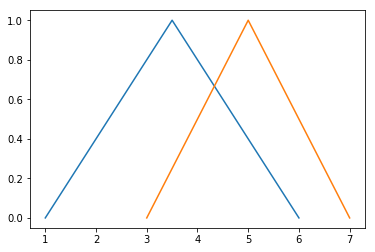

In [114]:
# vendo o gráfico
plt.plot(cfA.keys(), cfA.values())
plt.plot(cfB.keys(), cfB.values())

## Operações padrão
---
### Intersecção
(A ∩ B) (x) = min(A(x), B(x))

In [115]:

# mínimo ponto da intersecção dos conjuntos eu encontro 
# o maior grau de pertinência.

def intersection_fuzzy(cfA,cfB):
    chaves = list(set(cfA) & set(cfB))
    inter = {}
    for i in chaves:
        value = min(cfA[i], cfB[i])
        inter[i] = value
    return inter

AIB = intersection_fuzzy(cfA, cfB)

AIB    


{3: 0, 4: 0.5, 5: 0.4, 6: 0}

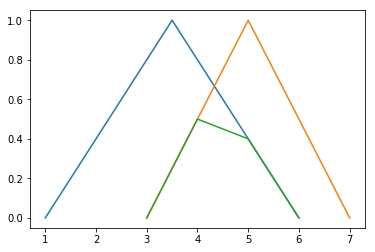

In [116]:
plt.plot(cfA.keys(), cfA.values())
plt.plot(cfB.keys(), cfB.values())
plt.plot(AIB.keys(), AIB.values()) 

###  União
(A U B) (x) = max(A(x), B(x))

In [117]:
def union_fuzzy(cfA,cfB):
    chaves = list(set(cfA).union(cfB))
    print(chaves)
    inter = {}
    for i in chaves:
        if i in cfA and i in cfB: # se tiverem a mesma chave
            value = max(cfA[i], cfB[i])
            inter[i] = value
        else:
            if i in cfA:
                inter[i] = cfA[i]
            else:
                inter[i] = cfB[i]
        
    return inter

AUB = union_fuzzy(cfA, cfB)
AUB

[1, 2, 3, 3.5, 4, 5, 6, 7]


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 1.0, 6: 0.5, 7: 0}

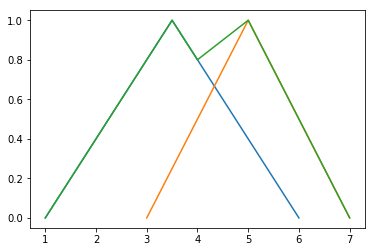

In [118]:
plt.plot(cfA.keys(), cfA.values())
plt.plot(cfB.keys(), cfB.values())
plt.plot(AUB.keys(), AUB.values()) 

###  Complemento
A’(x) = 1 – A

In [123]:
def complemento_fuzzy(conj):
    cj = {}
    for key in conj:
        cj[key] = 1-conj[key]
    return cj


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0}
{1: 1, 2: 0.6, 3: 0.19999999999999996, 3.5: 0.0, 4: 0.19999999999999996, 5: 0.6, 6: 1}


Text(0.5,1,'Complemento do Cojunto A')

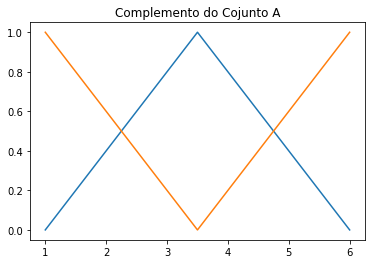

In [124]:
# complemento de A
c_cfA = complemento_fuzzy(cfA)
print(cfA)
print(c_cfA)

plt.plot(cfA.keys(), cfA.values())
plt.plot(c_cfA.keys(), c_cfA.values())
plt.title('Complemento do Cojunto A')

{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0}
{3: 1, 4: 0.5, 5: 0.0, 6: 0.5, 7: 1}


Text(0.5,1,'Complemento do Cojunto B')

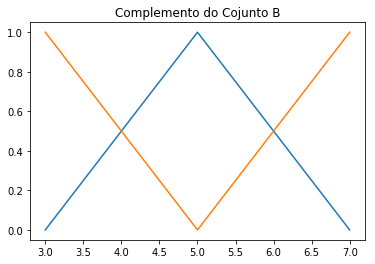

In [126]:
# complemento de B
c_cfB = complemento_fuzzy(cfB)
print(cfA)
print(c_cfB)

plt.plot(cfB.keys(), cfB.values())
plt.plot(c_cfB.keys(), c_cfB.values())
plt.title('Complemento do Cojunto B')

## Operações Generalizadas
---
### T-Normas e intersecção generalizada